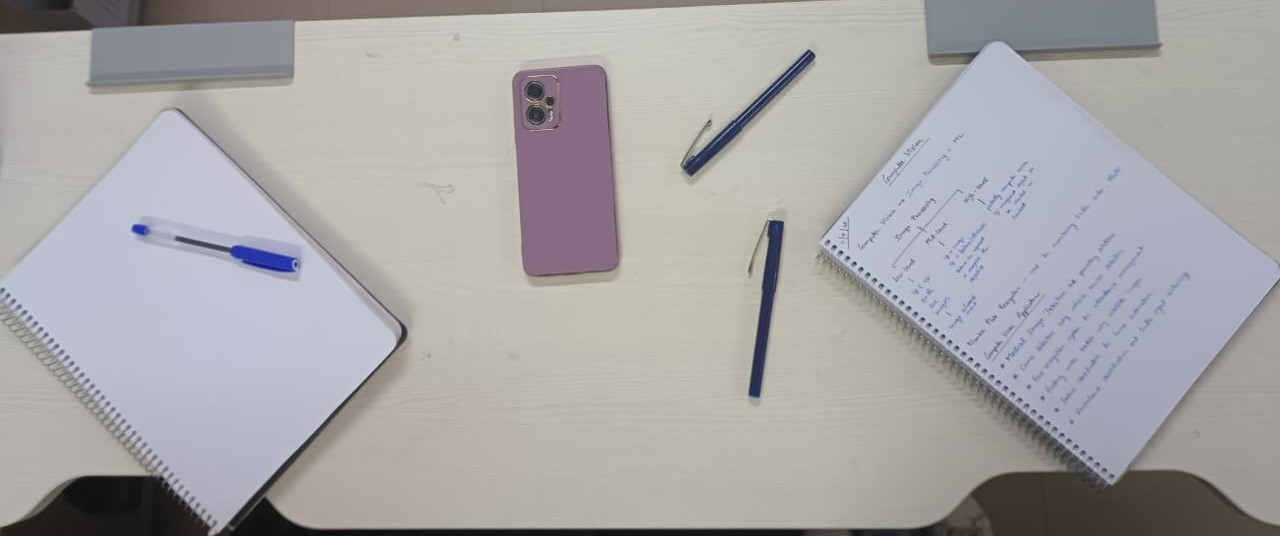

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input image
image = cv2.imread('/content/table.jpg')

#display original image
cv2_imshow(image)

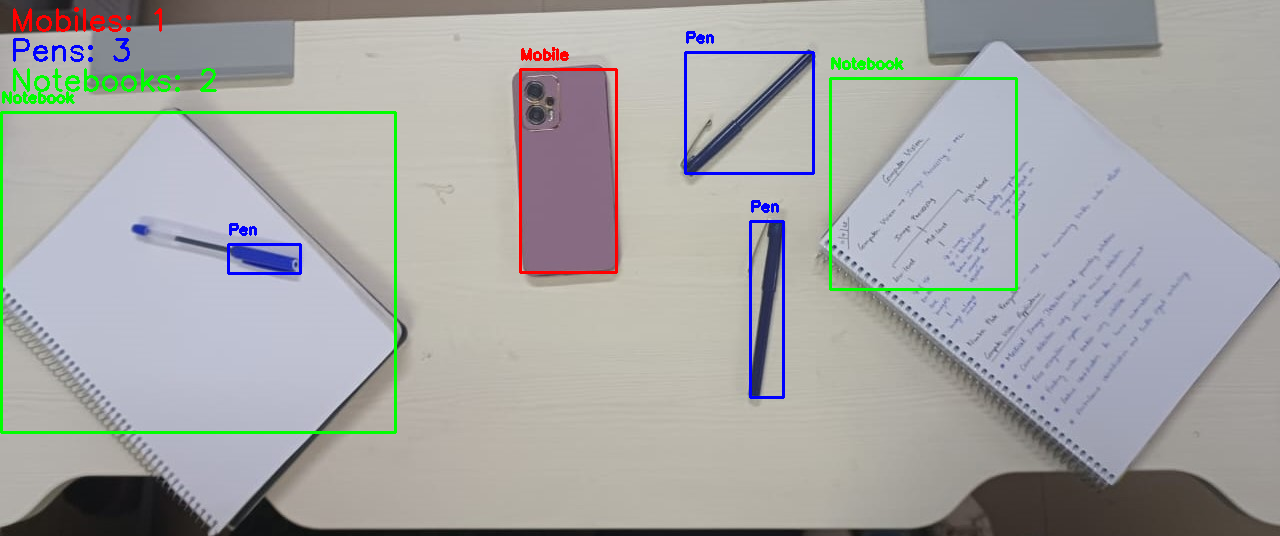

In [ ]:
# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color range for the mobile
mobile_color_range = np.array([[145, 50, 50], [175, 255, 255]])

# Create a mask for the mobile based on the color range
mask_mobile = cv2.inRange(hsv_image, mobile_color_range[0], mobile_color_range[1])

# Define color ranges for blue pens
lower_pens = np.array([90, 50, 50])
upper_pens = np.array([130, 255, 255])

# Create a mask for blue pens based on the color range
mask_pens = cv2.inRange(hsv_image, lower_pens, upper_pens)

# Define color ranges for notebooks
lower_notebooks = np.array([0, 0, 200])
upper_notebooks = np.array([180, 30, 255])

# Create a mask for notebooks based on the color range
mask_notebooks = cv2.inRange(hsv_image, lower_notebooks, upper_notebooks)

# Function for morphological operations
def apply_morphology(mask):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Apply morphological operations to enhance mobile, pen, and notebook detection
mask_mobile = apply_morphology(mask_mobile)
mask_pens = apply_morphology(mask_pens)
mask_notebooks = apply_morphology(mask_notebooks)

# Find contours in the mobile mask
contours_mobile, _ = cv2.findContours(mask_mobile, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contours in the blue pen mask
contours_pens, _ = cv2.findContours(mask_pens, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contours in the notebook mask
contours_notebooks, _ = cv2.findContours(mask_notebooks, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Constants for adjustment
min_contour_area_mobile = 200
min_contour_area_pens = 500
min_contour_area_notebooks = 1500  # Adjust this value for notebook detection

max_aspect_ratio = 3

# Initialize counts for detected mobiles, pens, and notebooks
mobile_count = 0
pen_count = 0
notebook_count = 0

# Initialize lists to store labels for detected mobiles, pens, and notebooks
mobile_labels = []
pen_labels = []
notebook_labels = []

# Draw bounding boxes around the detected mobiles and label them
for contour in contours_mobile:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    if cv2.contourArea(contour) > min_contour_area_mobile and aspect_ratio < max_aspect_ratio:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        label = "Mobile"
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        mobile_labels.append(label)
        mobile_count += 1

# Draw bounding boxes around the detected blue pens and label them
for contour in contours_pens:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    if cv2.contourArea(contour) > min_contour_area_pens and aspect_ratio < max_aspect_ratio:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Use (255, 0, 0) for blue color
        label = "Pen"
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        pen_labels.append(label)
        pen_count += 1

# Draw bounding boxes around the detected notebooks and label them
for contour in contours_notebooks:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    if cv2.contourArea(contour) > min_contour_area_notebooks and aspect_ratio < max_aspect_ratio:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Use (0, 255, 0) for green color
        label = "Notebook"
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        notebook_labels.append(label)
        notebook_count += 1

# Display the count of detected mobiles, pens, notebooks, and the image with bounding boxes
cv2.putText(image, f"Mobiles: {mobile_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2.putText(image, f"Pens: {pen_count}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
cv2.putText(image, f"Notebooks: {notebook_count}", (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
